### 📝 **Instructions**
#### **Predicting Diabetes**
This dataset originally comes from the National Institute of Diabetes and Digestive and Kidney Diseases. The goal is to predict, based on diagnostic measures, whether or not a patient has diabetes.

In [1]:
# Import libreries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import (MinMaxScaler,
                                   StandardScaler,
                                   LabelEncoder,
                                   OneHotEncoder)
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import (chi2,
                                       SelectKBest,
                                       f_regression)
from sklearn.model_selection import (train_test_split,
                                     GridSearchCV) # For Optimize
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.linear_model import (LogisticRegression,
                                  Lasso)
from sklearn.metrics import (accuracy_score,
                            confusion_matrix,
                            classification_report)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Optimize
from pickle import dump

### **Step 1: Loading the dataset**
The dataset can be found in this project folder under the name diabetes.csv. You can load it into the code directly from the link:

```text
https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv
```
Or download it and add it by hand in your repository.

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- Pregnancies. Number of pregnancies of the patient (numeric)
- Glucose. Plasma glucose concentration 2 hours after an oral glucose tolerance test (numeric)
- BloodPressure. Diastolic blood pressure (measured in mm Hg) (numeric)
- SkinThickness. Triceps skin fold thickness (measured in mm) (numeric)
- Insulin. 2-hour serum insulin (measured in mu U/ml) (numeric)
- BMI. Body mass index (numeric)
- DiabetesPedigreeFunction. Diabetes Pedigree Function (numeric)
- Age. Age of patient (numeric)
- Outcome. Class variable (0 or 1), being 0 negative in diabetes and 1 positive (numeric)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Create DF into ../data/raw
df_raw = df.copy()
df_raw.to_csv("../data/raw/df_raw.csv", index= False)

### **Step 2: Perform a full EDA**
This second step is vital to ensure that we keep the variables that are strictly necessary and eliminate those that are not relevant or do not provide information. Use the example Notebook we worked on and adapt it to this use case.

Be sure to conveniently divide the data set into train and test as we have seen in previous lessons.

In [5]:
# Step 2.1: Preprocessing data
df_interim = (
    df_raw
        .copy()
        .set_axis(
            df_raw.columns.str.replace(' ','_')
                          .str.replace(r'r\W', '', regex=True)
                          .str.lower()
                          .str.slice(0, 40), axis=1
        )
        .drop_duplicates().reset_index(drop=True)
)
df_interim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pregnancies               768 non-null    int64  
 1   glucose                   768 non-null    int64  
 2   bloodpressure             768 non-null    int64  
 3   skinthickness             768 non-null    int64  
 4   insulin                   768 non-null    int64  
 5   bmi                       768 non-null    float64
 6   diabetespedigreefunction  768 non-null    float64
 7   age                       768 non-null    int64  
 8   outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df_interim.to_csv("../data/interim/df_interim.csv")

In [7]:
# Split DF
df = df_interim.copy()

df_train, df_test = train_test_split(df, test_size=0.2, random_state=2024)

In [ ]:
display(df_train.describe().T)

,count,mean,std,min,25%,50%,75%,max
pregnancies,614.0,3.801303,3.341801,0.000,1.000,3.000,6.0000,17.00
glucose,614.0,121.402280,32.625455,0.000,99.000,118.000,141.7500,199.00
bloodpressure,614.0,69.456026,20.278257,0.000,64.000,72.000,80.0000,122.00
skinthickness,614.0,20.716612,15.769687,0.000,0.000,23.000,32.7500,63.00
insulin,614.0,80.947883,115.687775,0.000,0.000,34.000,125.0000,744.00
bmi,614.0,32.088111,8.109101,0.000,27.500,32.400,36.6000,67.10
diabetespedigreefunction,614.0,0.478990,0.344910,0.085,0.238,0.365,0.6485,2.42
age,614.0,33.100977,11.722438,21.000,24.000,29.000,40.0000,81.00
outcome,614.0,0.346906,0.476373,0.000,0.000,0.000,1.0000,1.00


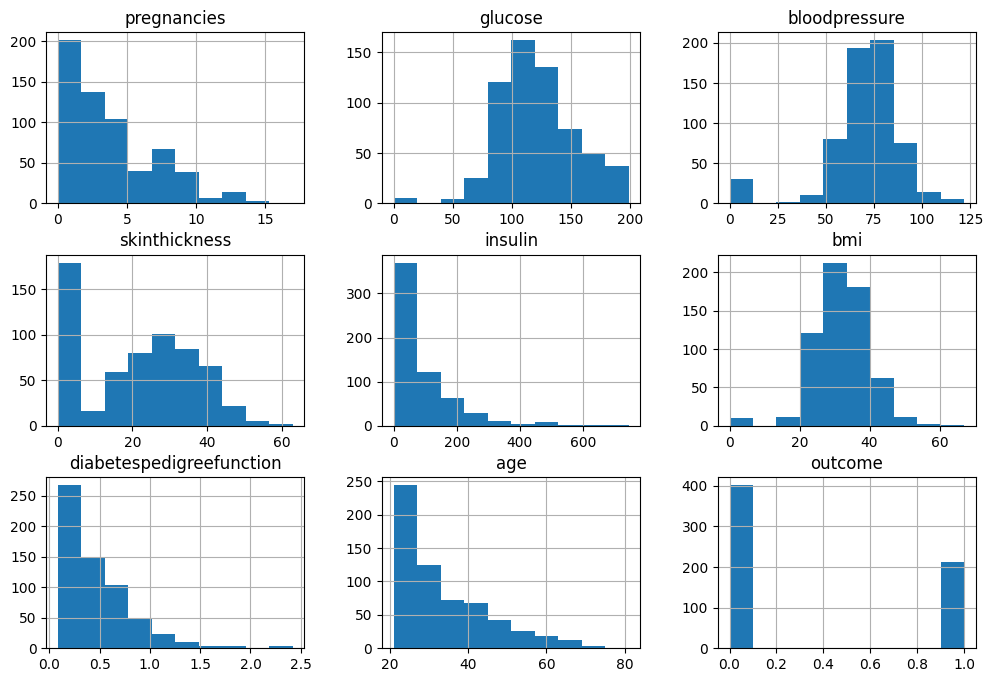

In [9]:
# Step 2.2: Univariate analysis
df_train.hist(figsize= (12, 8))
plt.show()

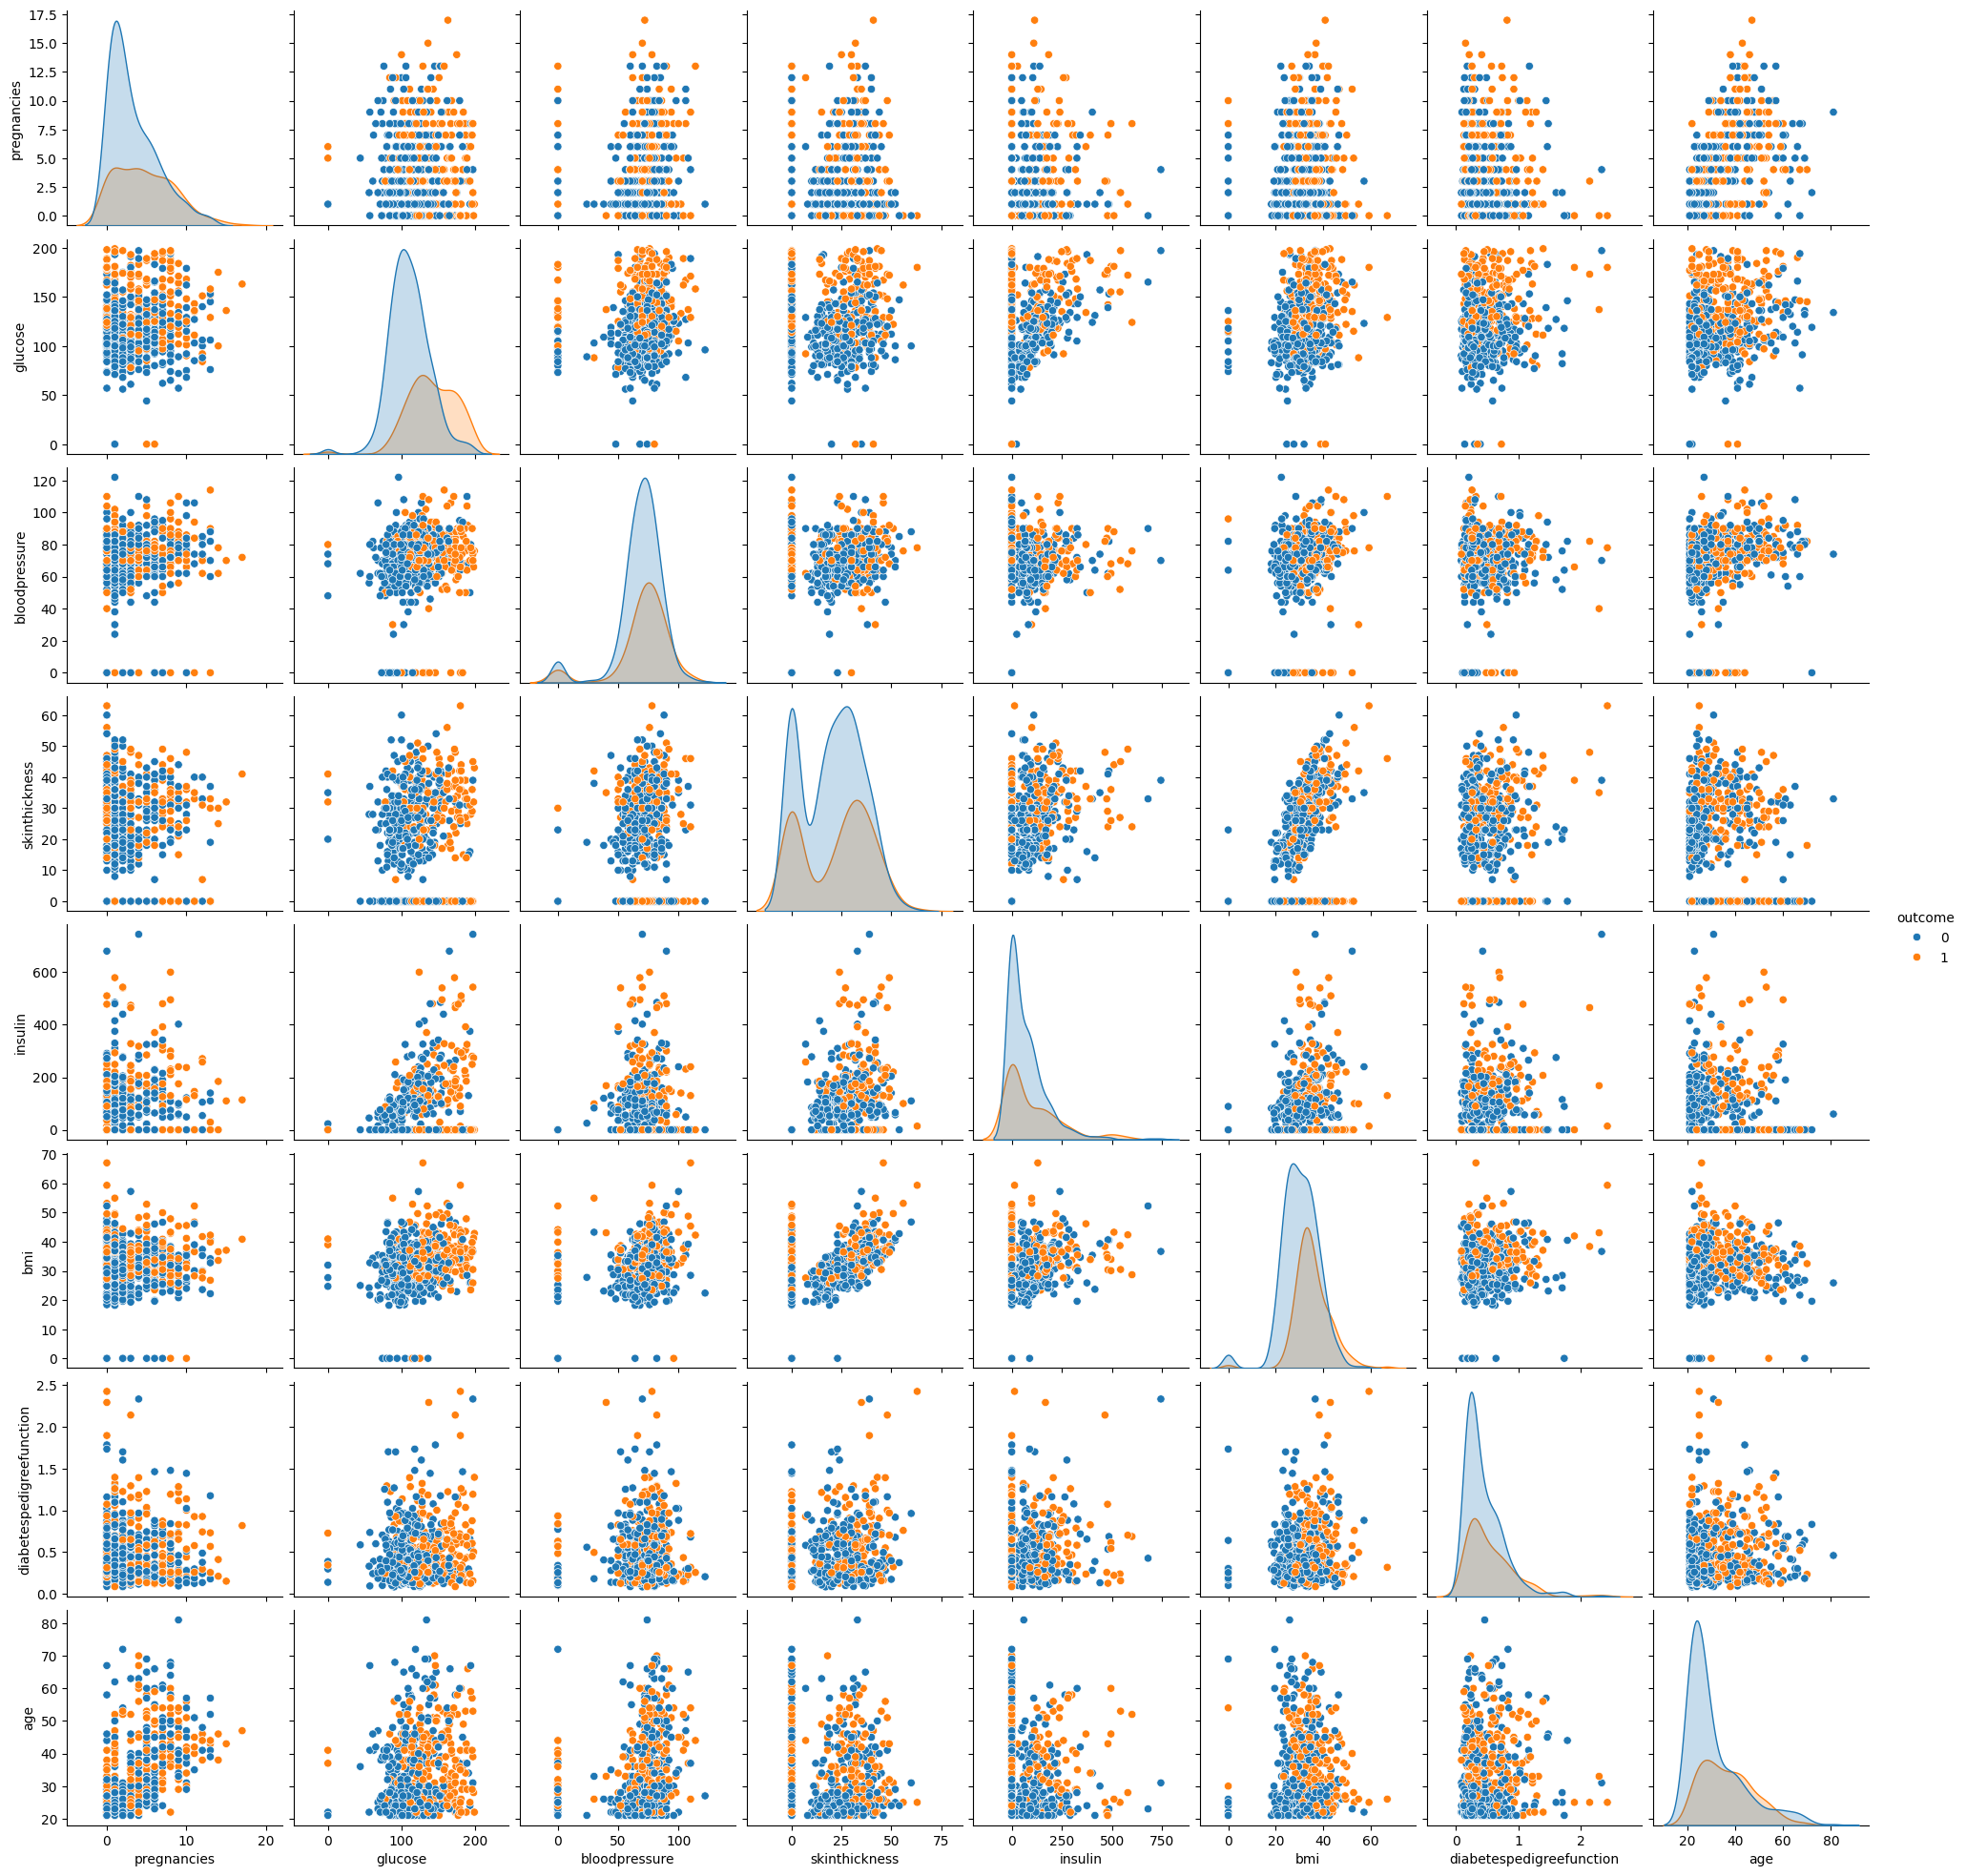

In [10]:
# Step 2.3: Bivariate analysis
sns.pairplot(data=df_train, hue='outcome')
plt.show()

- There are some visible linear relationships between some features, such as between glucose and bmi, or between age and pregnancies, although many of the other combinations do not show clear relationships.
- In some combinations, a difference can be seen between the classes (orange and blue), especially in the relationship of glucose with other variables such as age or insulin.

In [11]:
df_train.corr()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
pregnancies,1.000000,0.103766,0.128565,-0.097094,-0.090141,0.012952,-0.065062,0.557528,0.212451
glucose,0.103766,1.000000,0.160762,0.052897,0.331337,0.235860,0.146675,0.227980,0.446860
bloodpressure,0.128565,0.160762,1.000000,0.204393,0.091765,0.300139,0.031721,0.240959,0.056212
skinthickness,-0.097094,0.052897,0.204393,1.000000,0.448436,0.428181,0.205774,-0.144605,0.060447
insulin,-0.090141,0.331337,0.091765,0.448436,1.000000,0.200205,0.190423,-0.068207,0.120479
bmi,0.012952,0.235860,0.300139,0.428181,0.200205,1.000000,0.143785,0.031198,0.301577
diabetespedigreefunction,-0.065062,0.146675,0.031721,0.205774,0.190423,0.143785,1.000000,0.033151,0.147291
age,0.557528,0.227980,0.240959,-0.144605,-0.068207,0.031198,0.033151,1.000000,0.223038
outcome,0.212451,0.446860,0.056212,0.060447,0.120479,0.301577,0.147291,0.223038,1.000000


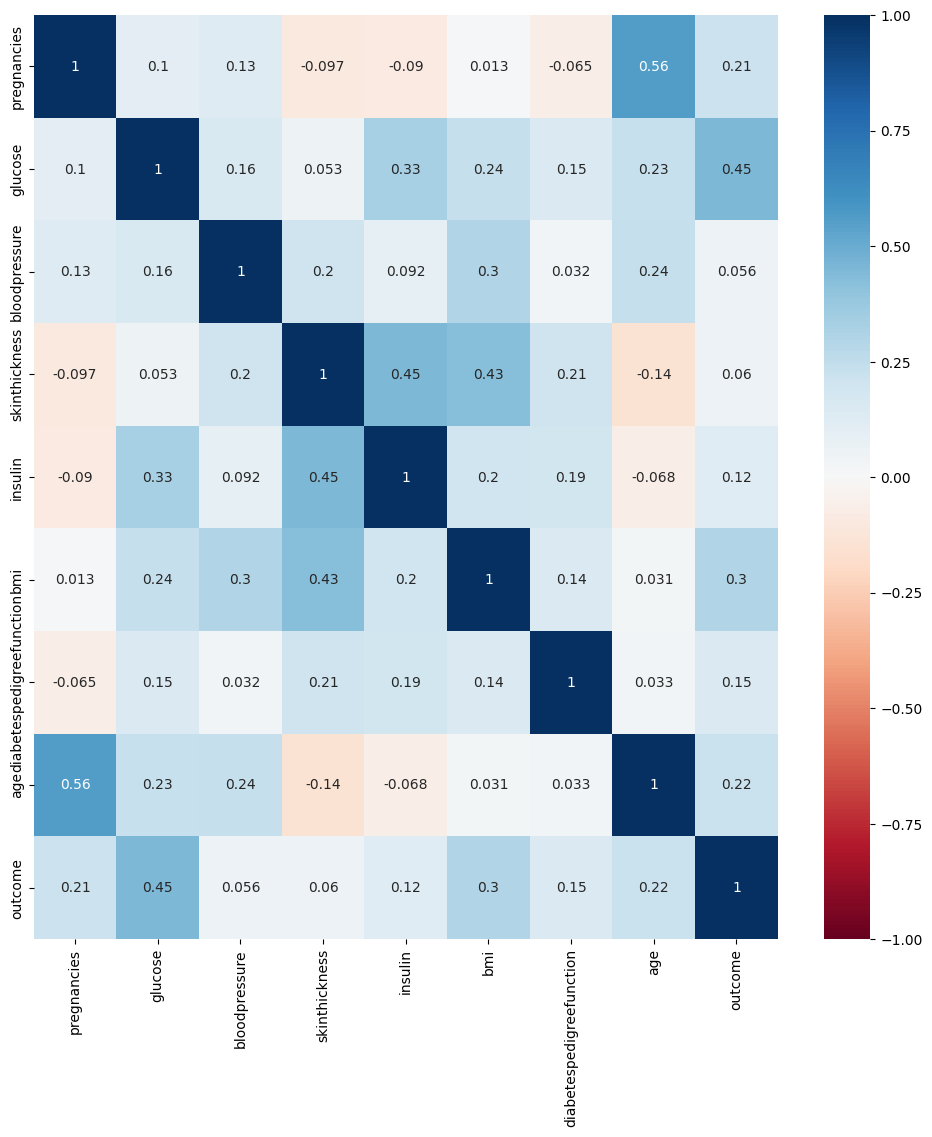

In [14]:
plt.figure(figsize=(12, 12))
sns.heatmap(df_train.corr(), vmin=-1, vmax=1, annot=True, cmap='RdBu')
plt.show()

There is no strong correlation between variables

In [15]:
X_train = df_train.drop('outcome', axis=1).reset_index(drop=True)
y_train = df_train['outcome'].reset_index(drop=True)
X_test = df_test.drop('outcome', axis=1).reset_index(drop=True)
y_test = df_test['outcome'].reset_index(drop=True)

select_model = SelectKBest(k=7)
select_model.fit(X_train, y_train)

select_cols = X_train.columns[select_model.get_support()]
X_train_sel = pd.DataFrame(select_model.transform(X_train), columns=select_cols)
X_test_sel = pd.DataFrame(select_model.transform(X_test), columns=select_cols)

In [16]:
display(X_train.head())
display(X_test.head())

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age
0,0,111,65,0,0,24.6,0.660,31
1,5,136,84,41,88,35.0,0.286,35
2,2,74,0,0,0,0.0,0.102,22
3,2,141,58,34,128,25.4,0.699,24
4,4,110,76,20,100,28.4,0.118,27


,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age
0,5,155,84,44,545,38.7,0.619,34
1,3,158,64,13,387,31.2,0.295,24
2,1,189,60,23,846,30.1,0.398,59
3,2,146,70,38,360,28.0,0.337,29
4,0,78,88,29,40,36.9,0.434,21


In [20]:
X_train_sel["outcome"] = y_train.values
X_test_sel["outcome"] = y_test.values
X_train_sel.to_csv("../data/processed/df_train_clean.csv", index = False)
X_test_sel.to_csv("../data/processed/df_test_clean.csv", index = False)

### **Step 3: Build a decision tree**
Start solving the problem by implementing a decision tree and analyze which of the two types satisfies your needs. Train it and analyze its results. Try modifying the function for calculating the purity of the nodes and use all the available ones. Describe them and analyze your results by graphing them.

In [21]:
df_train = pd.read_csv("../data/processed/df_train_clean.csv")
df_test = pd.read_csv("../data/processed/df_test_clean.csv")

In [22]:
display(df_train.head())
display(df_test.head())

,pregnancies,glucose,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,0.0,111.0,0.0,0.0,24.6,0.660,31.0,0
1,5.0,136.0,41.0,88.0,35.0,0.286,35.0,1
2,2.0,74.0,0.0,0.0,0.0,0.102,22.0,0
3,2.0,141.0,34.0,128.0,25.4,0.699,24.0,0
4,4.0,110.0,20.0,100.0,28.4,0.118,27.0,0


,pregnancies,glucose,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,5.0,155.0,44.0,545.0,38.7,0.619,34.0,0
1,3.0,158.0,13.0,387.0,31.2,0.295,24.0,0
2,1.0,189.0,23.0,846.0,30.1,0.398,59.0,1
3,2.0,146.0,38.0,360.0,28.0,0.337,29.0,1
4,0.0,78.0,29.0,40.0,36.9,0.434,21.0,0


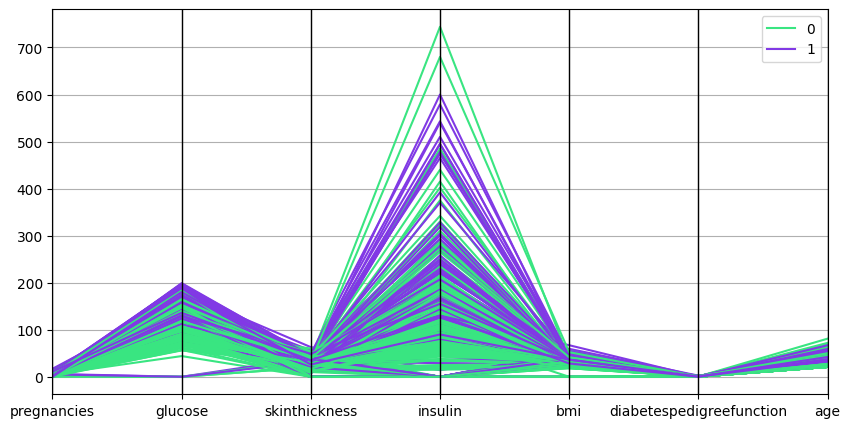

In [27]:
plt.figure(figsize= (10, 5))
pd.plotting.parallel_coordinates(df_train, 'outcome', color=("#39E581", "#8139E5"))
plt.show()

In [28]:
X_train = df_train.drop('outcome', axis=1).reset_index(drop=True)
y_train = df_train['outcome'].reset_index(drop=True)
X_test = df_test.drop('outcome', axis=1).reset_index(drop=True)
y_test = df_test['outcome'].reset_index(drop=True)

In [33]:
clf_tree = DecisionTreeClassifier()
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier()

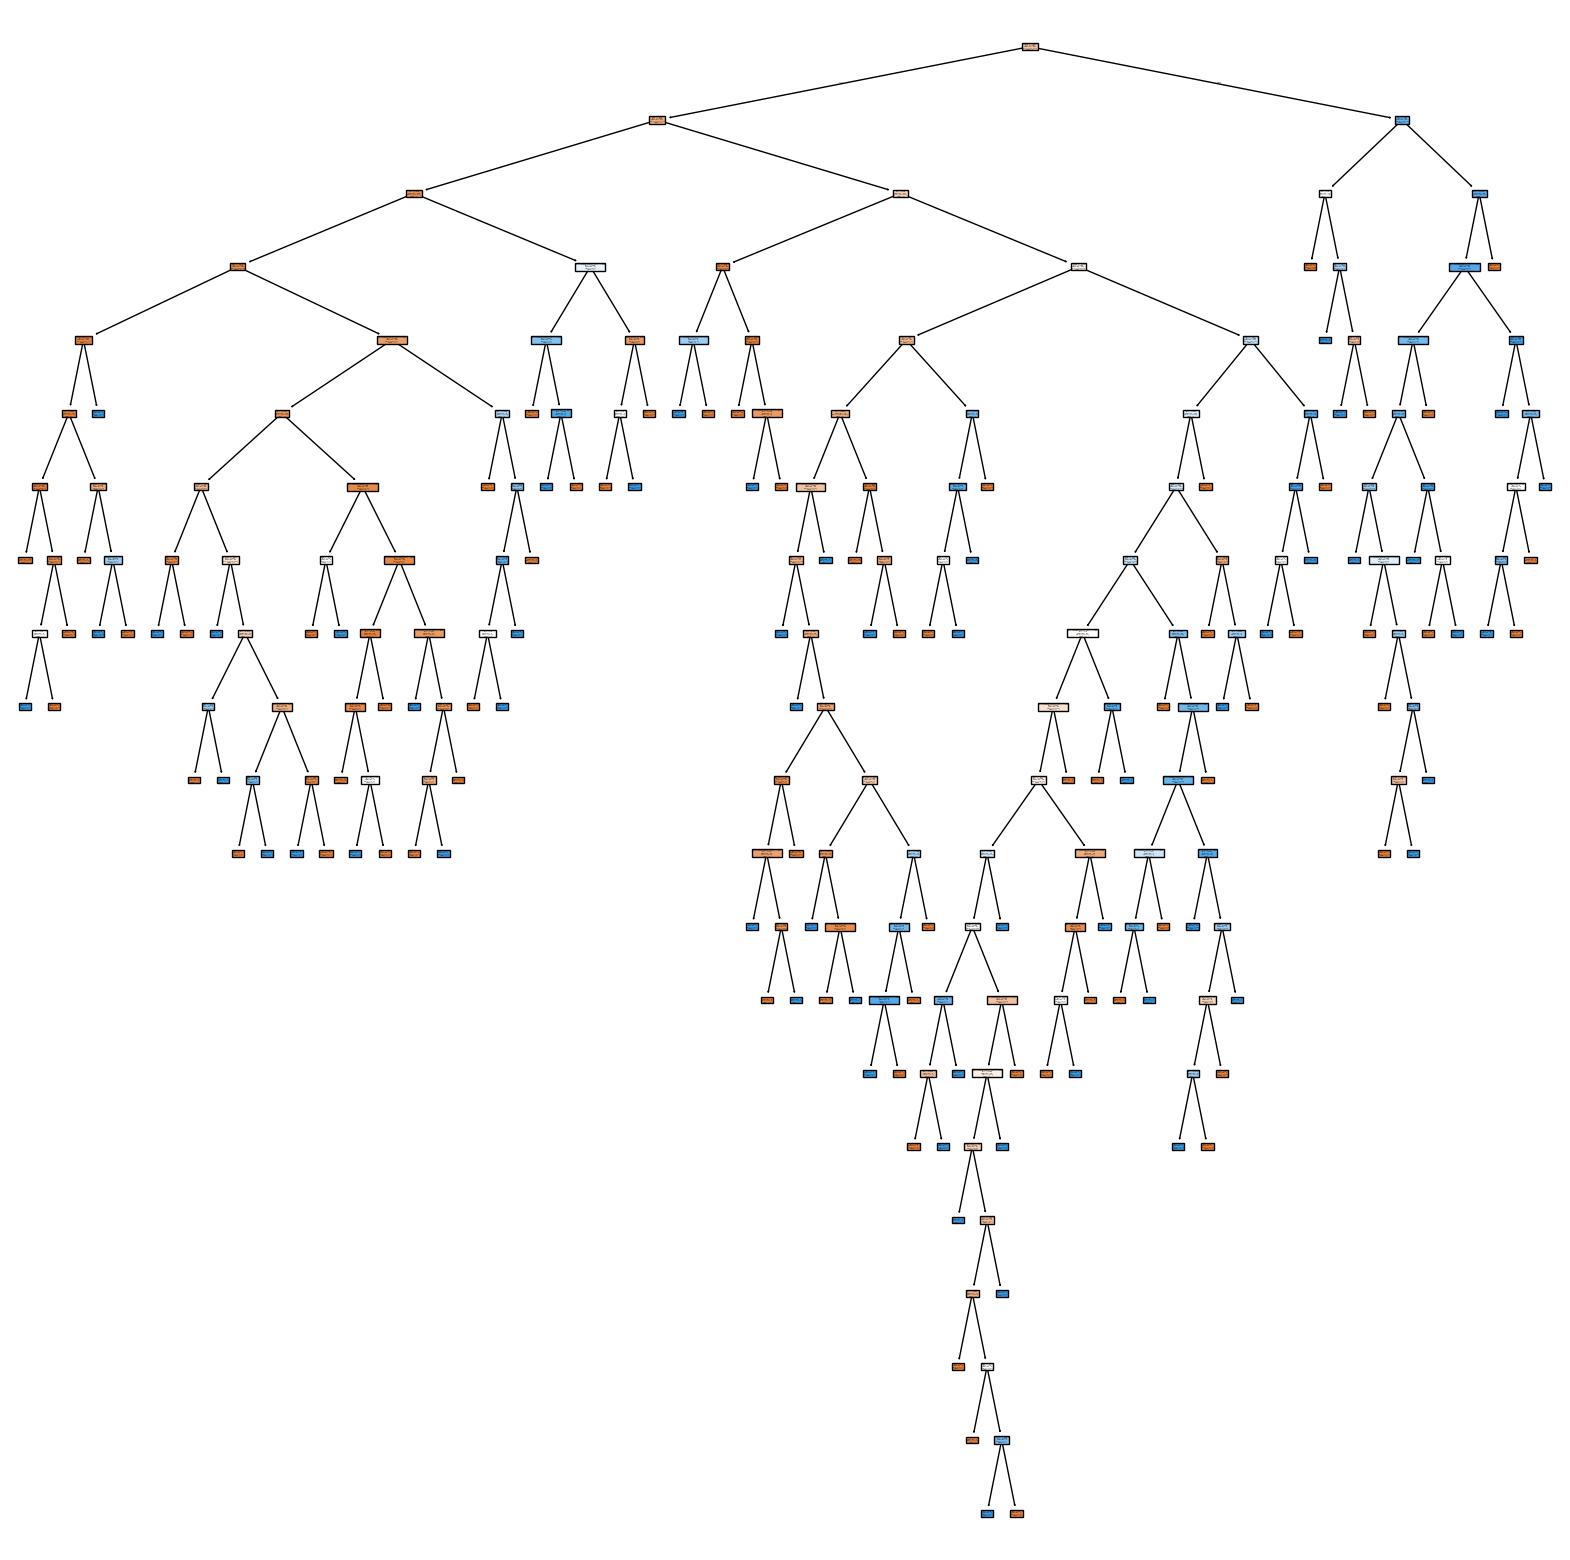

In [35]:
fig = plt.figure(figsize= (20, 20))
tree.plot_tree(clf_tree, feature_names=list(X_train.columns), class_names=['0', '1'], filled=True)
plt.show()

In [36]:
y_pred = clf_tree.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1])

In [37]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6883116883116883


### **Step 4: Optimize the previous model**
After training the tree with the different purity functions, it selects the best of them and optimizes its hyperparameters using a grid search.

In [38]:
hyperparams = {
    'criterion': ['gini', 'entropy', 'log_loss'], # Function to measure the quality of a split.
    'splitter': ['best', 'random'], # Strategy used to split into nodes.
    'max_depth': [None, 10, 20, 30, 40, 50], # Maximum depth of the tree.
    'min_samples_split': [2, 5, 10], # Minimum number of samples needed to split a node.
    'min_samples_leaf': [1, 2, 5, 10], # Minimum number of samples needed at a leaf node.
}

# Search
grid_search = GridSearchCV(clf_tree, hyperparams, scoring='accuracy', cv=10)
grid_search

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [39]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid_search.fit(X_train, y_train)

print(f"Best hyperparameters: {grid_search.best_params_}")

Best hyperparameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 10, 'min_samples_split': 2, 'splitter': 'random'}


In [41]:
clf_tree_op = DecisionTreeClassifier(criterion='gini', max_depth=20, min_samples_leaf=10, min_samples_split=2, splitter='random', random_state=2024)
clf_tree_op.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=10, random_state=2024,
                       splitter='random')

In [42]:
y_pred_op = clf_tree_op.predict(X_test)
y_pred_op

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0])

In [43]:
accuracy_op = accuracy_score(y_test, y_pred_op)
print(f"Accuracy: {accuracy_op}")

Accuracy: 0.7597402597402597


### **Step 5: Save the model**
Store the model in the corresponding folder

In [44]:
dump(clf_tree_op, open("../models/tree_classifier_crit-gini_maxdepth-20_minleaf-10_minsplit2_2024.sav", "wb"))